In [1]:
from nltk import sent_tokenize
text_sample = 'The Matrix is everywhere its all around us, here even in this room.  \
              You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

In [2]:
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [3]:
from nltk import word_tokenize
sentences = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentences)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
def tokenize_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

In [5]:
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [6]:
from nltk import ngrams

sentences = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentences)

all_ngrams = ngrams(words, 3)
ngram = [ngram for ngram in all_ngrams]
print(ngram)

[('The', 'Matrix', 'is'), ('Matrix', 'is', 'everywhere'), ('is', 'everywhere', 'its'), ('everywhere', 'its', 'all'), ('its', 'all', 'around'), ('all', 'around', 'us'), ('around', 'us', ','), ('us', ',', 'here'), (',', 'here', 'even'), ('here', 'even', 'in'), ('even', 'in', 'this'), ('in', 'this', 'room'), ('this', 'room', '.')]


In [7]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leewo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
print("영어 stop words 개수 : ", len(nltk.corpus.stopwords.words("english")))
print(nltk.corpus.stopwords.words("english")[:20])

영어 stop words 개수 :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [9]:
import nltk

stopwords = nltk.corpus.stopwords.words("english")
all_tokens = []

for sentence in word_tokens:
    filtered_words = []
    
    for word in sentence:
        word = word.lower()
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [10]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

print(stemmer.stem("working"), stemmer.stem("works"), stemmer.stem("worked"))
print(stemmer.stem("amusing"), stemmer.stem("amuses"), stemmer.stem("amused"))
print(stemmer.stem("happier"), stemmer.stem("happiest"))
print(stemmer.stem("fancier"), stemmer.stem("fanciest"))

work work work
amus amus amus
happy happiest
fant fanciest


In [11]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
# 품사를 다 찾아줘야함 (명사 : n, 형용사 : a, 동사 : v)
print(lemma.lemmatize("amusing", "v"), lemma.lemmatize("amuses", "v"), lemma.lemmatize("amused", "v"))
print(lemma.lemmatize("happier" ,"a"), lemma.lemmatize("happiest", "a"))
print(lemma.lemmatize("fancier", "a"), lemma.lemmatize("fanciest", "a"))

amuse amuse amuse
happy happy
fancy fancy


# Word2Vec

In [12]:
corpus = [
    "king is a strong man",
    "queen is a wise woman",
    "boy is a young man",
    "girl is a young woman",
    "prince is a young king",
    "princess is a young queen",
    "man is strong",
    "woman is a pretty",
    "prince is a boy will be king",
    "princess is a girl will be queen"
]

In [13]:
def remove_stop_words(corpus):
    stop_words = nltk.corpus.stopwords.words("english")
    results = []
    for text in corpus:
        tmp = text.split(" ")
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

In [14]:
corpus = remove_stop_words(corpus)

In [15]:
words = []
for text in corpus:
    for word in text.split(" "):
        words.append(word)
words = set(words)

In [16]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [17]:
word2int = {}
for i, word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2
data = []

for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence))]:
            if neighbor != word:
                data.append([word, neighbor])

In [18]:
import pandas as pd
for text in corpus:
    print(text)
df = pd.DataFrame(data, columns = ["input", "label"])
df.head(10)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


,input,label
0,king,strong
1,strong,king
2,strong,man
3,man,king
4,man,strong
5,queen,wise
6,wise,queen
7,wise,woman
8,woman,queen
9,woman,wise


In [19]:
word2int

{'girl': 0,
 'queen': 1,
 'prince': 2,
 'young': 3,
 'woman': 4,
 'princess': 5,
 'pretty': 6,
 'king': 7,
 'boy': 8,
 'man': 9,
 'wise': 10,
 'strong': 11}

In [20]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding
X = []
Y = []

for x, y in zip(df["input"], df["label"]):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))
X_train = np.asarray(X)
y_train = np.asarray(Y)

x = tf.placeholder(tf.float32, shape = (None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape = (None, ONE_HOT_DIM))

EMBEDDING_DIM = 2

W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x, W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))

prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis = [1]))

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [21]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 20000
for i in range(iteration):
    sess.run(train_op, feed_dict = {x : X_train, y_label : y_train})
    if i % 3000 == 0:
        print("iteration : {0} loss : {1}".format(i, sess.run(loss, feed_dict = {x : X_train, y_label : y_train})))

iteration : 0 loss : 2.9188039302825928
iteration : 3000 loss : 1.6499541997909546
iteration : 6000 loss : 1.5905537605285645
iteration : 9000 loss : 1.5746146440505981
iteration : 12000 loss : 1.5653793811798096
iteration : 15000 loss : 1.5587444305419922
iteration : 18000 loss : 1.5535290241241455


In [22]:
vectors = sess.run(W1 + b1)
print(vectors)

[[-4.234605   -2.3823178 ]
 [-4.686404   -3.0799792 ]
 [ 1.2481346  -3.688607  ]
 [ 0.05542183  0.14860785]
 [-1.1873657  -0.7515346 ]
 [-2.4603348  -2.7852662 ]
 [-2.6488204   2.5522597 ]
 [ 3.0551965  -4.6625133 ]
 [ 1.247642   -1.4764032 ]
 [ 1.1401331  -1.7594187 ]
 [-3.4392374   1.0965414 ]
 [ 1.917006    1.9831033 ]]


In [23]:
w2v_df = pd.DataFrame(vectors, columns = ["x1", "x2"])
w2v_df["word"] = words
w2v_df = w2v_df[["word", "x1", "x2"]]
w2v_df

,word,x1,x2
0,girl,-4.234605,-2.382318
1,queen,-4.686404,-3.079979
2,prince,1.248135,-3.688607
3,young,0.055422,0.148608
4,woman,-1.187366,-0.751535
5,princess,-2.460335,-2.785266
6,pretty,-2.648820,2.552260
7,king,3.055197,-4.662513
8,boy,1.247642,-1.476403
9,man,1.140133,-1.759419


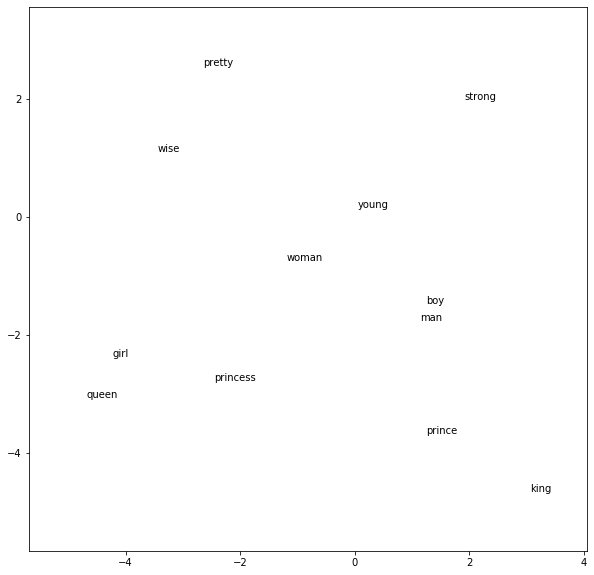

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
fig.patch.set_facecolor('xkcd:white')

for word, x1, x2 in zip(w2v_df["word"], w2v_df["x1"], w2v_df["x2"]):
    ax.annotate(word, (x1, x2))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis = 0)[0] - PADDING
y_axis_min = np.amin(vectors, axis = 0)[1] - PADDING
x_axis_max = np.amax(vectors, axis = 0)[0] + PADDING
y_axis_max = np.amax(vectors, axis = 0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

# Bag Of Words

In [1]:
text_sample_01 = 'The Matrix is everywhere its all around us, here even in this room. \
                  You can see it out your window or on your television. \
                  You feel it when you go to work, or go to church or pay your taxes.'
text_sample_02 = 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe\
                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'
text = []
text.append(text_sample_01); text.append(text_sample_02)
print(text, "\n", len(text))

['The Matrix is everywhere its all around us, here even in this room.                   You can see it out your window or on your television.                   You feel it when you go to work, or go to church or pay your taxes.', 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'] 
 2


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer()
cnt_vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [3]:
ftr_vect = cnt_vect.transform(text)
ftr_vect

<2x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [4]:
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)

<class 'scipy.sparse.csr.csr_matrix'> (2, 51)
  (0, 0)	1
  (0, 2)	1
  (0, 6)	1
  (0, 7)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	2
  (0, 15)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	2
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	3
  (0, 25)	1
  (0, 26)	1
  (0, 30)	1
  (0, 31)	1
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	2
  :	:
  (1, 1)	4
  (1, 3)	1
  (1, 4)	2
  (1, 5)	1
  (1, 8)	1
  (1, 9)	1
  (1, 14)	1
  (1, 16)	1
  (1, 17)	1
  (1, 18)	2
  (1, 27)	2
  (1, 28)	1
  (1, 29)	1
  (1, 32)	1
  (1, 33)	1
  (1, 34)	1
  (1, 35)	2
  (1, 38)	4
  (1, 40)	1
  (1, 42)	1
  (1, 43)	1
  (1, 44)	1
  (1, 47)	1
  (1, 49)	7
  (1, 50)	1


In [5]:
print(cnt_vect.vocabulary_)

{'the': 38, 'matrix': 22, 'is': 19, 'everywhere': 11, 'its': 21, 'all': 0, 'around': 2, 'us': 41, 'here': 15, 'even': 10, 'in': 18, 'this': 39, 'room': 30, 'you': 49, 'can': 6, 'see': 31, 'it': 20, 'out': 25, 'your': 50, 'window': 46, 'or': 24, 'on': 23, 'television': 37, 'feel': 12, 'when': 45, 'go': 13, 'to': 40, 'work': 48, 'church': 7, 'pay': 26, 'taxes': 36, 'take': 35, 'blue': 5, 'pill': 27, 'and': 1, 'story': 34, 'ends': 9, 'wake': 42, 'bed': 3, 'believe': 4, 'whatever': 44, 'want': 43, 'red': 29, 'stay': 33, 'wonderland': 47, 'show': 32, 'how': 17, 'deep': 8, 'rabbit': 28, 'hole': 16, 'goes': 14}


In [6]:
cnt_vect = CountVectorizer(max_features=5)
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)

<class 'scipy.sparse.csr.csr_matrix'> (2, 5)
  (0, 1)	3
  (0, 2)	1
  (0, 3)	3
  (0, 4)	3
  (1, 0)	4
  (1, 2)	4
  (1, 3)	7
  (1, 4)	1


In [10]:
cnt_vect = CountVectorizer(ngram_range=(2, 2))
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 74)
  (0, 0)	1
  (0, 4)	1
  (0, 9)	1
  (0, 10)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	2
  (0, 17)	1
  (0, 20)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  (0, 26)	1
  (0, 27)	1
  (0, 28)	1
  (0, 29)	1
  (0, 30)	1
  (0, 31)	1
  (0, 32)	1
  (0, 33)	1
  (0, 37)	1
  (0, 38)	1
  (0, 43)	1
  (0, 45)	1
  :	:
  (1, 21)	1
  (1, 22)	1
  (1, 34)	2
  (1, 35)	1
  (1, 36)	1
  (1, 39)	1
  (1, 40)	1
  (1, 41)	1
  (1, 42)	2
  (1, 44)	1
  (1, 46)	1
  (1, 47)	1
  (1, 48)	1
  (1, 50)	1
  (1, 54)	1
  (1, 55)	1
  (1, 56)	1
  (1, 59)	1
  (1, 61)	1
  (1, 65)	1
  (1, 66)	1
  (1, 67)	2
  (1, 68)	1
  (1, 69)	1
  (1, 70)	1
{'the matrix': 45, 'matrix is': 27, 'is everywhere': 23, 'everywhere its': 14, 'its all': 26, 'all around': 0, 'around us': 4, 'us here': 53, 'here even': 17, 'even in': 13, 'in this': 20, 'this room': 49, 'room you': 37, 'you can': 62, 'can see': 9, 'see it': 38, 'it out': 24, 'out your': 32, 'your window': 73, 'window or': 58, 'or on': 30, 'on you

# 희소 행렬 - COO 형식

In [11]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

In [13]:
from scipy import sparse

data = np.array([3, 1, 2])

row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [14]:
print(type(sparse_coo))
print(sparse_coo)
dense01 = sparse_coo.toarray()
print(type(dense01), "\n", dense01)

<class 'scipy.sparse.coo.coo_matrix'>
  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
<class 'numpy.ndarray'> 
 [[3 0 1]
 [0 2 0]]


# 희소 행렬 - CSR 형식

In [16]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                  [1, 4, 0, 3, 2, 5],
                  [0, 6, 0, 3, 0, 0],
                  [2, 0, 0, 0, 0, 0],
                  [0, 0, 0, 7, 0, 8],
                  [1, 0, 0, 0, 0, 0]])
# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8 ,1])
# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])
# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))
# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])
# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print("COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인")
print(sparse_coo.toarray())
print("CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인")
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [17]:
print(sparse_csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [18]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                  [1, 4, 0, 3, 2, 5],
                  [0, 6, 0, 3, 0, 0],
                  [2, 0, 0, 0, 0, 0],
                  [0, 0, 0, 7, 0, 8],
                  [1, 0, 0, 0, 0, 0]])
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [23]:
print(coo.toarray(), "\n")
print(csr.toarray())

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]] 

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
